In [48]:
#!printenv
import os
print os.getenv('PUI2016')
print os.getenv('PUIDATA')

/home/cusp/ps3369/PUI2016
/home/cusp/ps3369/PUIdata


In [49]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json
s = json.load(open(os.getenv('PUI2016') + "/fbb_matplotlibrc.json") )
pl.rcParams.update(s)


Populating the interactive namespace from numpy and matplotlib


# I am reading in data from January 2015. It would be a good idea to use data from warmer months, since there are more riders in the warm weather and the more data the smaller the STATISTICAL NOISE. You should use data from multiple months, joining multiple datasets, thus addressing systematic errors as well

In [3]:
datestring = '201501'
getCitiBikeCSV(datestring)

('Downloading', '201501')
file in place, you can continue


In [42]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [43]:
df['tripduration_min'] = df['tripduration']/60
df1 = df.drop([u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'birth year'],axis = 1)
df1.head()

,tripduration,usertype,gender,tripduration_min
0,1346,Subscriber,2,22.433333
1,363,Subscriber,1,6.050000
2,346,Subscriber,1,5.766667
3,182,Subscriber,1,3.033333
4,969,Subscriber,1,16.150000


In [68]:
df1 = df1[df1.gender != 0]
df1.gender.replace(to_replace=1, value = 'Male', inplace = True)
df1.gender.replace(to_replace=2, value = 'Female', inplace = True)


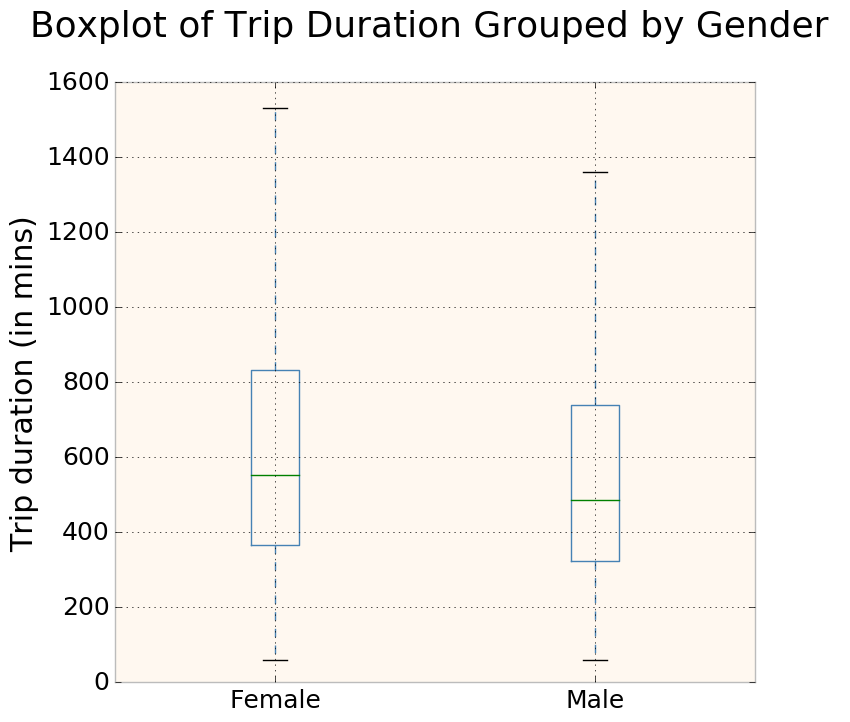

In [73]:
df1.boxplot(column='tripduration', by = 'gender', sym = '', figsize=(8,8), grid =True)
pl.title("Boxplot of Trip Duration Grouped by Gender \n ")
pl.ylabel('Trip duration (in seconds)')
pl.xlabel("")
pl.suptitle("")

##      Figure 1: Boxplot of Tripduration of CitiBike riders grouped by gender(Male and Female)